# **Загрузка данных, предобработка, обучение модели**

## Скачивание архива с данными из облака и распаковка архива

In [ ]:
!gdown --id 120fgForM_FPs6VLorTEehhbjagJfJBRv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=120fgForM_FPs6VLorTEehhbjagJfJBRv
To: /content/merged_data.zip
100% 53.5M/53.5M [00:00<00:00, 115MB/s]


In [ ]:
!unzip /content/merged_data.zip

Archive:  /content/merged_data.zip
  inflating: merged_data.csv         


In [ ]:
!rm /content/merged_data.zip

## Предобработка данных

Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Считывание файла и проверка

In [ ]:
united_data = pd.read_csv('/content/merged_data.csv', sep=',')

In [ ]:
united_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441719 entries, 0 to 1441718
Data columns (total 54 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1441719 non-null  int64  
 1   Timestamp      1441719 non-null  object 
 2   FIT101         1441719 non-null  float64
 3   LIT101         1441719 non-null  float64
 4   MV101          1441719 non-null  int64  
 5   P101           1441719 non-null  int64  
 6   P102           1441719 non-null  int64  
 7   AIT201         1441719 non-null  float64
 8   AIT202         1441719 non-null  float64
 9   AIT203         1441719 non-null  float64
 10  FIT201         1441719 non-null  float64
 11  MV201          1441719 non-null  int64  
 12  P201           1441719 non-null  int64  
 13  P202           1441719 non-null  int64  
 14  P203           1441719 non-null  int64  
 15  P204           1441719 non-null  int64  
 16  P205           1441719 non-null  int64  
 17  P206    

In [ ]:
# удаление лишнего столбца
united_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# превращение колонки с временем в индекс
united_data = united_data.set_index('Timestamp')

In [ ]:
# обработка целевой переменной
united_data['Normal/Attack'] = united_data['Normal/Attack'].str.replace(' ', '')
united_data.loc[united_data["Normal/Attack"] == "Normal", "Normal/Attack"] = 0
united_data.loc[united_data["Normal/Attack"] == "Attack", "Normal/Attack"] = 1

In [ ]:
display(united_data)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28/12/2015 9:59:55 AM,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,2,1,250.8171,1.778105,189.8552,0.000128,1,1,1,0
28/12/2015 9:59:56 AM,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,2,...,2,1,250.8171,1.778105,189.5027,0.000128,1,1,1,0
28/12/2015 9:59:57 AM,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,2,...,2,1,250.8171,1.778105,189.5027,0.000128,1,1,1,0


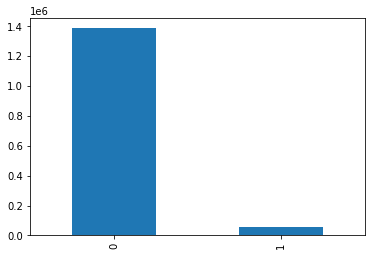

In [55]:
united_data["Normal/Attack"].value_counts().plot(kind='bar')

## Обучение модели

In [ ]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(united_data.drop('Normal/Attack', axis=1))

In [ ]:
Y = united_data['Normal/Attack']
Y = Y.astype('int')
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, random_state=0, stratify=Y)

In [ ]:
united_data['Normal/Attack'].value_counts(ascending=True)

1      54621
0    1387098
Name: Normal/Attack, dtype: int64

In [ ]:
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
predicted_y = classifier.predict(X_test)
predicted_y

array([0, 0, 0, ..., 0, 0, 0])

Метрика accuracy по классификации:

In [ ]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.99


Все метрики:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print(accuracy_score(Y_test,predicted_y))
print(precision_score(Y_test,predicted_y))
print(recall_score(Y_test,predicted_y))
print(f1_score(Y_test,predicted_y))

0.9897289348833338
0.9826398991368441
0.741999267667521
0.8455311691563047


## **Кластеризация**

**K-means**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df=united_data
df = df.drop('Normal/Attack', axis=1)

In [ ]:
X_std = StandardScaler().fit_transform(df)

In [ ]:
Y = united_data['Normal/Attack']
Y = Y.astype('int')
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, random_state=0, stratify=Y)

In [ ]:
km = KMeans(n_clusters = 2, init='k-means++', max_iter=100)
km.fit(X_std)

KMeans(max_iter=100, n_clusters=2)

In [ ]:
y_pred = km.labels_.astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0 1404939]
 [      1   36780]]


Сравнение получившихся кластеров с целевой переменной датасета

In [ ]:
print(accuracy_score(united_data['Normal/Attack'].astype('int'),y_pred))

0.9810177988914622


Визуализация

In [52]:
from itertools import cycle, islice

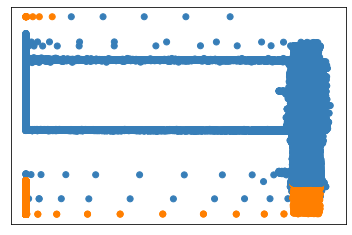

In [53]:
plt.subplot()
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00']),
                                  int(max(y_pred) + 1))))
plt.scatter(X_std[:, 0], X_std[:, 1], color=colors[y_pred])

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 30, min_samples = 6)
dbscan.fit(X_std)

In [ ]:
y_pred_db = km.labels_.astype(int)
y_pred_db